In [82]:
#importing needed functions
import numpy
from matplotlib import pyplot
from math import sin, cos, log, ceil
import math 
from matplotlib import rcParams
%matplotlib inline


Establishing constants

In [83]:
g=9.8                      #gravity
Velocity_trim = 4.9        #Trim Velocity
C_Drag=0.2                 #Coefficient of Drag, or D/L if C_lift=1
C_Lift= 1.0             #Coefficient of Lift
X_pos=0                  #Horizontal Position
Y_pos=2                  #Average human height in meters


Sets up a relationship as per Module 1 Notebook 3 where U is an array with 4 values (Velocity, Theta, X position, and y position) returns values for function f as u[1-4] are inputs
    

In [84]:


def f(u):
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - C_Drag/C_Lift*g/Velocity_trim**2*v**2,
                      -g*cos(theta)/v + g/Velocity_trim**2*v,
                      v*cos(theta),
                      v*sin(theta)])


Now define the critical Euler step

In [85]:
def euler_step(u, f, dt):
    return u + dt * f(u)

This next equation is how I map the paper airplanes trajectory as a function of intial inputs velocity and angle of plane

In [86]:
def Trajectory(v0, theta0):
    T=40             #gives my a time end so I don't start an infinite loop
    dt=0.001         #Timestep
    N=int(T/dt)+1   #Number of iterations 
    u=numpy.empty((N,4)) #Sets up an array of 4, which goes to N cells
    u[0]=numpy.array([v0, theta0, X_pos, Y_pos])
    

    for n in range(N-1):
        u[n+1]= euler_step(u[n], f, dt)
        if u[n+1,3] < 0: #condition statement, if X position is zero the I have hit the ground
            break
        
    return u,n
        


In [87]:
v=numpy.linspace(4.9, 9, 5)
theta=numpy.linspace(-3.14/4.0, 3.14/4, 5)


In [88]:
X_Max_Range=numpy.zeros((5,5),dtype=float)
Max_Range=0

In [89]:

for i in range(5):
    for j in range(5):
        u,n = Trajectory(v[i], theta[j])
        X_flight = u[0:n,2]
        Y_flight =u[0:n,3]
        X_Max_Range[i][j]=X_flight[-1]
        if (X_Max_Range[i][j] > Max_Range ):
            Max_Range = X_Max_Range[i][j]
            i_index=i
            j_index=j
print(u)

[[  9.00000000e+00   7.85000000e-01   0.00000000e+00   2.00000000e+00]
 [  8.98646087e+00   7.87903202e-01   6.36649442e-03   2.00636143e+00]
 [  8.97292152e+00   7.90801959e-01   1.27049439e-02   2.01273171e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]]


Initial Velocity: 9.0
Initial Angle: -0.3925
Maximum Range: 17.7498443802


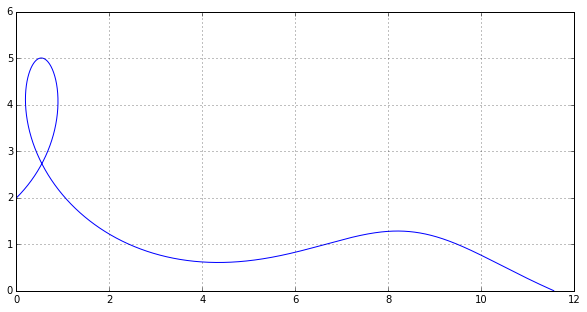

In [90]:
pyplot.figure(figsize=(10,5))
pyplot.grid(True)
pyplot.plot(X_flight, Y_flight)
print("Initial Velocity:", v[i_index])
print("Initial Angle:", theta[j_index])
print("Maximum Range:", Max_Range )